<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98(%EC%98%81%EC%96%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# 경로 설정
imdb_dir = '/content/gdrive/My Drive/pytest/aclImdb_v1_small/aclImdb/'

!ls '/content/gdrive/My Drive/pytest/aclImdb_v1_small/aclImdb/'

test  train


In [0]:
# Train Data Loading(imdb 데이터, 영어로 된 영화리뷰, 긍정/부정으로 이진분류)
import os
train_dir = os.path.join(imdb_dir, 'train')
labels = [] ; texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [4]:
# Data 확인
print('texts 0:', texts[0])
print('texts len:', len(texts))

print('labels 0:', labels[0])
print('labels len:', len(labels))

print('texts type:', type(texts))

texts 0: I rented this one on DVD without any prior knowledge. I was suspicious seeing Michael Madsen appearing in a movie I have never heard of, but it was a freebie, so why not check it out.<br /><br />Well my guess is that Mr. Blonde would very much like to forget he's ever taken part in such a shame of a film.<br /><br />Apparently, if your script and dialogs are terrible, even good actors cannot save the day. Not to mention the amateur actors that flood this film. Too many non-native-English-speakers play parts of native-English-speakers, reading out lines from a script that should have been thrown away and not having been made into a movie. It's unbelievable how unbelievable all the lines in the movie sound. The music is awful and totally out of place, and the whole thing looks and sounds like a poor school play.<br /><br />I recommend you watch it just so you would appreciate other, better, movies. This is why I gave it a 3 instead of the 1 it deserves.
texts len: 60
labels 0: 0

In [6]:
# Data Tokenizing
# 텍스트에 사용된 단어의 종류를 빈도 순으로 정렬하는 작업을 수행한다
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts) * 0.3)  	# 검증 샘플은 전체의 30%로 한다
max_words = 10000               			            # 데이터셋에서 가장 빈도 높은 (10000-1) 9999 개의 단어만 사용한다 이렇게 안쓰면 모든 것을 다 가져오니까 sparsed matrix problem(메모리 많이 차지, 정확도 떨어짐)
maxlen = 200					                            # 항상 200 단어가 되도록 길이를 고정한다

tokenizer = Tokenizer(num_words=max_words)	      # 상위빈도 ９９９９ 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts)     			          # 단어 인덱스를 구축한다 ，　빈도계산을　한다．　ｅｘ）ａ－＞１，ｔｈｅ－＞２（고빈도부터　차례로）　
word_index = tokenizer.word_index           		  # 단어 인덱스만 가져온다

TensorFlow is already loaded. Please restart the runtime to change versions.


In [7]:
# Tokenizing 결과 확인
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 2828개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, 'for': 13, 'film': 14, 'was': 15, 'are': 16, 'with': 17, 'but': 18, 'movie': 19, 'as': 20, 'not': 21, 'you': 22, 'at': 23, 'he': 24, 'on': 25, 'be': 26, 'one': 27, 'have': 28, 'all': 29, 'an': 30, 'his': 31, 'like': 32, 'good': 33, 'has': 34, 'or': 35, 'some': 36, 'so': 37, 'just': 38, 'even': 39, 'my': 40, 'who': 41, 'by': 42, 'about': 43, 'story': 44, 'from': 45, 'out': 46, 'when': 47, 'time': 48, "it's": 49, 'very': 50, 'they': 51, 'if': 52, 'no': 53, 'really': 54, 'acting': 55, 'there': 56, 'him': 57, 'every': 58, 'ever': 59, 'most': 60, 'more': 61, 'other': 62, 'people': 63, 'great': 64, 'how': 65, 'also': 66, 'her': 67, 'would': 68, 'your': 69, 'too': 70, 'their': 71, 'bad': 72, 'made': 73, 'what': 74, 'she': 75, 'stanley': 76, 'me': 77, 'can': 78, 'had': 79, 'make': 80, 'characters': 81, 'only

In [8]:
# Data Sequencing
# 문자를 숫자로 변환하는 작업을 수행한다
# 상위 빈도 10,000(max_words)에　속하는　단어만 추출하여 word_index의 숫자 리스트로 변환한다.
data = tokenizer.texts_to_sequences(texts)		# Tokenizer 결과가 여기서 반영된다.

print('data 0:', data[0])　　　　　　　　　　　＃빈도수에　의해　만들어진　ｉｎｄｅｘ（４가　６０보다　빈도수　높다，　６２가　４랑　다른　단어라는　것만　알래）
print('texts 0:', texts[0])　　　　　　　　　　　　＃ｉ　가　９번째로　많이　쓰인다는　소리야　

data 0: [9, 686, 10, 27, 25, 494, 216, 90, 1140, 687, 9, 15, 1141, 157, 384, 217, 1142, 8, 3, 19, 9, 28, 130, 495, 4, 18, 11, 15, 3, 1143, 37, 179, 21, 496, 11, 46, 6, 6, 85, 40, 308, 7, 12, 497, 1144, 68, 50, 123, 32, 5, 688, 131, 59, 1145, 218, 8, 101, 3, 689, 4, 3, 14, 6, 6, 690, 52, 69, 180, 2, 691, 16, 181, 39, 33, 96, 254, 309, 1, 498, 21, 5, 499, 1, 500, 96, 12, 1146, 10, 14, 70, 102, 1147, 692, 501, 693, 694, 385, 4, 692, 501, 693, 502, 46, 182, 45, 3, 180, 12, 106, 28, 115, 503, 255, 2, 21, 504, 115, 73, 91, 3, 19, 49, 256, 65, 256, 29, 1, 182, 8, 1, 19, 257, 1, 310, 7, 695, 2, 311, 46, 4, 258, 2, 1, 183, 197, 312, 2, 1148, 32, 3, 386, 184, 694, 6, 6, 9, 198, 22, 158, 11, 38, 37, 22, 68, 696, 62, 142, 92, 10, 7, 179, 9, 387, 11, 3, 313, 259, 4, 1, 388, 11, 1149]
texts 0: I rented this one on DVD without any prior knowledge. I was suspicious seeing Michael Madsen appearing in a movie I have never heard of, but it was a freebie, so why not check it out.<br /><br />Well my guess 

In [9]:
print(type(texts))
print(type(data))

<class 'list'>
<class 'list'>


In [10]:
# Data Pading 연습
from keras.preprocessing.sequence import pad_sequences

sequences = [[1, 2, 3, 4, 5], [1, 2, 3, 4], [1]]		  # nested list
padded = pad_sequences(sequences, maxlen=3)		  # 2D tensor 
print(padded)

[[3 4 5]
 [2 3 4]
 [0 0 1]]


Using TensorFlow backend.


In [11]:
# Data Pading
data = pad_sequences(data, maxlen=maxlen) 

print('data:', data)
print('data 0:', data[0])
print(len(data[0]))

print(word_index) #200 padding 들어가서 0이 들어간다. 

data: [[   0    0    0 ...  388   11 1149]
 [1183  716   10 ...    5 1203  159]
 [   0    0    9 ...    6    6 1217]
 ...
 [   0    0    0 ...    4  382  156]
 [   0    0    0 ...    7    3 2802]
 [2805  176    1 ...   87    1 1135]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    9  686   10   27   25  494  216   90 1140  687
    9   15 1141  157  384  217 1142    8    3   19    9   28  130  495
    4   18   11   15    3 1143   37  179   21  496   11   46    6    6
   85   40  308    7   12  497 1144   68   50  123   32    5  688  131
   59 1145  218    8  101    3  689    4    3   14    6    6  690   52
   69  180    2  691   16  181   39   33   96  254  309    1  498   21
    5  499    1  500   96   12 1146   10   14   70  102 1147  692  501
  693  694  385    4  692  501  693  502   46  182   45    3  180   12
  106   28  115  503  255    2   21  504  115   73   91    3   19   49
  256   65  256   29    1  182    8    1   19  2

In [12]:
print(type(texts))
print(type(data))  #padding과정을 거치면 np배열이 된다.
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(60, 200)


In [13]:
# One-Hot-Encoding 연습
sample = [[5, 6, 7], [8, 9, 10]]
arr = np.zeros((len(sample), 10+1))		# “10”은 11번째에 들어가게 되므로 11개의 공간을 만들어야 한다
for i, seq in enumerate(sample):		  # 리스트가 2개이므로 i는 총 2회(0, 1) 반복되며,
   	arr[i, seq] = 1.				          # 각 i에서 리스트의 number가 가리키는 곳에 1을 기록한다
arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [0]:
# One-Hot-Encoding
def to_one_hot(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


data = to_one_hot(data, dimension=max_words) 
labels = np.asarray(labels).astype('float32')

In [15]:
# One-Hot-Encoding 결과 확인

print('data:', data)
print(len(data[0]))					# dimension=10000으로 했으므로 각 행은 10,000개를 가지고 있다
print('data [0][0:100]:', data[0][0:100])

print(word_index)

data: [[1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
10000
data [0][0:100]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0.]
{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, 'for': 13, 'film': 14, 'was': 15, 'are': 16, 'with': 17, 'but': 18, 'movie': 19, 'as': 20, 'not': 21, 'you': 22, 'at': 23, 'he': 24, 'on': 25, 'be': 26, 'one': 27, 'have': 28, 'all': 29, 'an': 30, 'his': 31, 'like': 32, 'good': 33, 'has': 34, 'or': 35, 'some': 36, 'so': 37, 'just': 38, 'even': 39, 'my': 40, 'who': 41, 'by': 42, 'about': 43, 'story': 44, 'from': 45, 'out': 46, 'when': 47, 't

In [16]:
print(type(texts))
print(type(data))
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(60, 10000)


In [17]:
# Train 데이터와 Validation 데이터 준비

print('데이터 텐서의 크기:', data.shape)  		# (25000, 10000)
print('레이블 텐서의 크기:', labels.shape) 		# (25000,) data와 label이 모두 2D 텐서가 되었음

indices = np.arange(data.shape[0]) 		        # 0 ~ 24999 까지의 숫자를 생성
np.random.shuffle(indices)     			          # 0 ~ 24999 까지의 숫자를 랜덤하게 섞음
data = data[indices]    				              # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음 
labels = labels[indices]				              # label도 같은 순서로 섞음 

print(indices)

데이터 텐서의 크기: (60, 10000)
레이블 텐서의 크기: (60,)
[17 16  9 45 44 35 36 50 55 59  4  8 52 38 24 11 20 57 53 31 14 47  2  3
 33 26  7 18 49  0 48  6 30 12 32 13 19 58  1 46 40 23 37 28 54 21 29 42
 39 10 43 25 41 51 27 22 34 15  5 56]


In [0]:
# 훈련데이터와 검증데이터 분리
x_train = data[validation_ratio:] 			      # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:] 			    # 훈련데이터의 70%를 훈련데이터 Label (data와 labels는 같은 순서)
x_val = data[:validation_ratio] 			        # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio] 			      # 훈련데이터의 30%를 검증데이터 Label

In [0]:
# 모델 정의하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()                                              # 모델을 새로 정의

model.add(Dense(64, activation='relu', input_shape=(max_words,)))	# 첫 번째 은닉층
model.add(Dense(32, activation='relu'))                           # 두 번째 은닉층
model.add(Dense(1, activation='sigmoid'))                 		    # 출력층

In [20]:
# 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile & Train Model
# 모델 컴파일
# 가중치 업데이트 방법은 RMSprop을 사용하였다. 이동평균의 방법을 도입하여 조절해간다
# 신경망의 출력이 확률이므로 crossentropy를 사용하는 것이 최선이다
# crossentropy는 원본의 확률 분포와 예측의 확률 분포를 측정하여 조절해 간다
# 또한 이진 분류이므로 binary_crossentropy를 사용한다
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 모델 훈련
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련한다. 보통 32개에서 시작하여 512개까지 중에서 찾는다
# 훈련 데이터로 훈련하고, 검증 데이터로 검증한다 
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
history_dict = history.history

Epoch 1/10
2/2 [==============================] - 0s 92ms/step - loss: 0.6981 - acc: 0.4762 - val_loss: 0.6578 - val_acc: 0.4444
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 0.4703 - acc: 0.9762 - val_loss: 0.5915 - val_acc: 0.8333
Epoch 3/10
2/2 [==============================] - 0s 20ms/step - loss: 0.2898 - acc: 1.0000 - val_loss: 0.5925 - val_acc: 0.4444
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 0.1794 - acc: 1.0000 - val_loss: 0.4969 - val_acc: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 0.1154 - acc: 1.0000 - val_loss: 0.5030 - val_acc: 0.8333
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.0751 - acc: 1.0000 - val_loss: 0.4642 - val_acc: 0.9444
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 0.0524 - acc: 1.0000 - val_loss: 0.4569 - val_acc: 0.9444
Epoch 8/10
2/2 [==============================] - 0s 22ms/step - loss: 0.0393 - acc: 1.0000 - val

In [23]:
# 경로 변경
%cd /content/gdrive/My Drive/pytest/

/content/gdrive/My Drive/pytest


In [0]:
# Save Model
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_binary_model.h5')


# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
# Accuracy & Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)		# [0.79, 0.90, 0.93, 0.94, 0.96, 0.97, 0.98, 0.98, 0.98, 0.99]
epochs = range(1, len(acc) +1)			# range(1, 11)

Accuracy of each epoch: [0.4761904776096344, 0.976190447807312, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


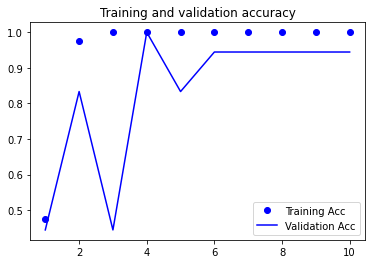

In [26]:
# Plotting Accuracy
import matplotlib.pyplot as plt

# 훈련데이터의 정확도에 비해 검증데이터의 정확도는 낮게 나타난다
# epoch가 높아지면 모델은 훈련데이터에 매우 민감해져 오히려 새로운 데이터를 잘 못 맞춘다
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()